In [12]:
import time
import pandas as pd
import math
import numpy as np
from scipy.spatial.distance import cdist
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_data(dataset):

    df = pd.read_csv(dataset)

    xDf = df.iloc[:, 0: len(df.columns) - 1]
    yDf = df.iloc[:, len(df.columns) - 1]

    X = np.array(xDf.values)
    Y = np.array(yDf.values)

    return X, Y


def normalize_data(X):

    normX = np.zeros((len(X), len(X[0])))

    for col in range(len(X[0])):
        m = np.mean(X[:, col])
        stdv = np.std(X[:, col])
        normX[:, col] = (X[:, col] - m) / float(stdv)

    return normX

In [6]:
X, y = get_data('bank_sub1_ohc.csv')
X = pd.DataFrame(normalize_data(X))

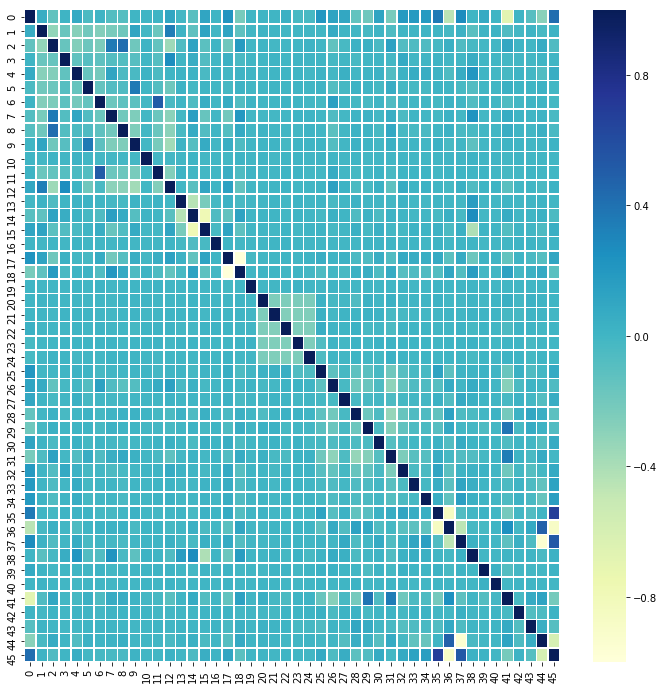

In [22]:
# calculate the correlation matrix
corr = X.corr()

# plot the heatmap

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, 
        xticklabels = corr.columns,
        yticklabels = corr.columns, 
            linewidths=.5, cmap="YlGnBu")

In [23]:
cmap = sns.cubehelix_palette(8, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())